
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


In [66]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##
## More complete directions for this tutorial are in tut4.pdf
##

#1) Calculate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.
import numpy as np

size = 1000

np.random.seed(42)

x = np.random.normal(0,1,size = size)
y = np.random.normal(0,1,size = size)

sx = np.sum((x-np.mean(x))**2)/(size-1.)
sy = np.sum((y-np.mean(y))**2)/(size-1.)

rxy = np.sum((x-np.mean(x))*(y-np.mean(y)))/(size*np.sqrt(sx*sy))
print(rxy)


-0.04035947142215071


In [67]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.
import matplotlib.pyplot as plt 

rxy_distr = np.empty([1000])

for i in range(size) : 
    x = np.random.normal(0,1,size = size)
    y = np.random.normal(0,1,size = size)

    sx = np.sum((x-np.mean(x))**2)/(size-1.)
    sy = np.sum((y-np.mean(y))**2)/(size-1.)

    rxy_distr[i] = np.sum((x-np.mean(x))*(y-np.mean(y)))/(size*np.sqrt(sx*sy))
    

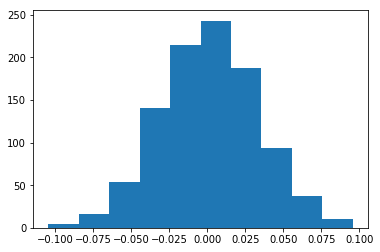

In [68]:
#3) Plot a histogram of your  $r_{xy}$ values.
_ = plt.hist(rxy_distr)

In [69]:
#4) What is the fraction of times $|r_{xy}|$ is larger than your measured value 
#   for homework\_01\_2d-datafile.csv ?  Would you expect to find this if there 
#   were no correlation?
import pandas as pd

rxy_025 = 0
rxy_05 = 0
rxy_08 = 0

for i in range(1000) : 
    if np.absolute(rxy_distr[i]) > 0.025 : 
        rxy_025 = rxy_025 +1 

for i in range(1000) : 
    if np.absolute(rxy_distr[i]) > 0.05 : 
        rxy_05 = rxy_05 + 1 
        
for i in range(1000) : 
    if np.absolute(rxy_distr[i]) > 0.08 : 
        rxy_08 = rxy_08 + 1 

print("Larger than 0.025: " + str(float(rxy_025)/float(size)))
print("Larger than 0.05: " + str(float(rxy_05)/float(size)))
print("Larger than 0.08: " + str(float(rxy_08)/float(size)))

print("These values imply that the variables aren't correlated.")

filename = '/home/STUDENTI/loreta.minutilli/Scaricati/homework_01_2d-datafile.csv'
data = pd.read_csv(filename)
data.head()

x_h = np.array(data[['X']])
y_h = np.array(data[['Y']])

sx_h = np.sum((x_h-np.mean(x_h))**2)/(size-1.)
sy_h = np.sum((y_h-np.mean(y_h))**2)/(size-1.)

rxy_h = np.sum((x_h-np.mean(x_h))*(y_h-np.mean(y_h)))/(size*np.sqrt(sx_h*sy_h))

print(rxy_h)

print("This value implies that the variables are correlated.")
rxy_95 = 0
for i in range(size) : 
    if np.absolute(rxy_distr[i]) > rxy_h : 
        rxy_95 = rxy_95 + 1 

print("Larger than " + str(rxy_h) + ": " + str(rxy_95))
    


Larger than 0.025: 0.447
Larger than 0.05: 0.121
Larger than 0.08: 0.01
These values imply that the variables aren't correlated.
0.9484965806973132
This value implies that the variables are correlated.
Larger than 0.9484965806973132: 0


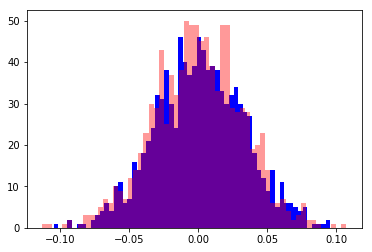

In [70]:
#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?

rxy_distr_h = np.empty([size])

for i in range(size) : 
    x = np.random.normal(np.mean(x_h),np.sqrt(sx_h),size = size)
    y = np.random.normal(np.mean(y_h),np.sqrt(sy_h),size = size)
    
    

    rxy_distr_h[i] = np.sum((x-np.mean(x))*(y-np.mean(y)))/(size*np.sqrt(np.var(x)*np.var(y)))
    
plt.hist(rxy_distr, bins = 60, color = 'blue')
plt.hist(rxy_distr_h, bins = 60, alpha = 0.4, color = 'red')
plt.show()


In [71]:
#6) Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?

rxy_distr_s = np.sort(rxy_distr)
r_95 = rxy_distr_s[950]
print(r_95)
p = 0.95

r_95var = np.var(rxy_distr)
r_95mean = np.mean(rxy_distr)

pdf_r95 = np.exp(-((r_95-r_95mean)**2)/(2*r_95var))/np.sqrt(2*np.pi*r_95var)

var95 = 2*p*(1-p)/(size*(pdf_r95)**2)

print("The variance in the estimate of r0.95 is " + str(var95))

0.05537390291239271
The variance in the estimate of r0.95 is 1.0396519611845684e-05


The Spearman correlation coefficient is -0.025963045963045963


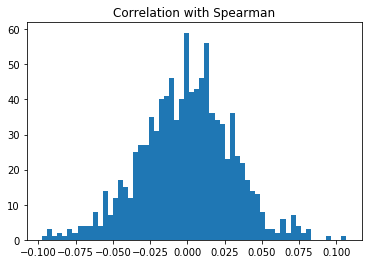

The Spearman correlation coefficient for the data in the homework is 0.9404303804303806
The Kendall tau is 0.008524524524524525


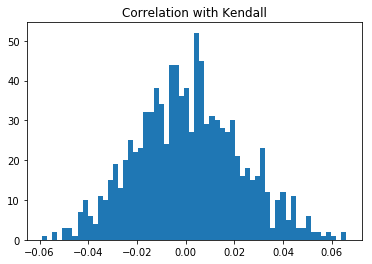

The Kendall tau for the data in the homework is 0.7919839839839841


In [72]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?

import scipy.stats as sts

x = np.random.normal(0,1,size = size)
y = np.random.normal(0,1,size = size)

spearman = sts.spearmanr(x,y)
print("The Spearman correlation coefficient is " + str(spearman[0]))

spear_distr = np.empty([size])

for i in range(size) : 
    x = np.random.normal(0,1,size = size)
    y = np.random.normal(0,1,size = size)
    
    sp_results = sts.spearmanr(x,y)
    
    spear_distr[i] = sp_results[0]
    
_ = plt.hist(spear_distr,bins = 60)
_ = plt.title("Correlation with Spearman")
plt.show()

spearman_h = sts.spearmanr(x_h,y_h)

print("The Spearman correlation coefficient for the data in the homework is " + str(spearman_h[0]))

kendall = sts.kendalltau(x,y)
print("The Kendall tau is " + str(kendall[0]))

kendall_distr = np.empty([size])

for i in range(size) :
    x = np.random.normal(0,1,size = size)
    y = np.random.normal(0,1,size = size)
    
    k_results = sts.kendalltau(x,y)
    
    kendall_distr[i] = k_results[0]
    
_ = plt.hist(kendall_distr,bins = 60)
_ = plt.title("Correlation with Kendall")
plt.show()

kendall_h = sts.kendalltau(x_h,y_h)

print("The Kendall tau for the data in the homework is " + str(kendall_h[0]))
